In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Saving kaggle.json to kaggle.json
100% 66.0M/66.0M [00:00<00:00, 163MB/s]

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [2]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_curve,precision_score,recall_score,roc_auc_score,make_scorer
from matplotlib.colors import Normalize
import pandas as pd
from pandas.core.frame import DataFrame 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [3]:
def metric(y_test,y_pred):
    cm=confusion_matrix(y_test, y_pred)
    tp=cm[1][1] #vrai positifs 
    tn=cm[0][0] #vrai negatifs
    fp=cm[0][1] #faux positifs
    fn=cm[1][0] #faux negatifs
    score=(2*((tp+tn)/y_test.size) + 5*(tp/(fn+tp)))/7 #(2*accuracy + 5*rappel)/7
#     print(f"score : {score} soit {score* 100:.2f}%")
    return float(score)

In [4]:
def VotingClassification(X_tr,y_tr,X_ts,y_ts):
    #classificateurs de base
    logreg = LogisticRegression(C=0.001,penalty='l2')
    dt = DecisionTreeClassifier(max_depth=5)
    KNN=KNeighborsClassifier(n_neighbors =1)
    #ensemble de vote 
    VC=VotingClassifier(estimators=[('régression logistique', logreg), ('arbre de décision', dt), ('knn', KNN)],voting='hard')
    VC.fit(X_tr,y_tr)
    y_pred = VC.predict(X_ts)
    #performance
    print('Precision : {0:0.5f}'.format(precision_score(y_ts , y_pred)))
    print('Recall : {0:0.5f}'.format(recall_score(y_ts , y_pred)))
    print('F1 : {0:0.5f}'.format(f1_score(y_ts , y_pred)))
    print('roc_auc_score : {0:0.5f}'.format(roc_auc_score(y_ts , y_pred)))
    print('metrique personnalisée (MP): {0:0.5f}'.format(metric(y_ts,y_pred)))
    #matrice de confusion
    print(f"\\\\Matrice de confusion ///:- \n {confusion_matrix(y_ts, y_pred)}")
    sns.heatmap(pd.DataFrame(confusion_matrix(y_ts, y_pred)), annot=True, annot_kws={"size": 15}, cmap="winter" ,fmt='g')
    plt.title('Matrice de confusion', y=1.1, fontsize = 15)
    plt.xlabel('Prédit',fontsize = 15)
    plt.ylabel('Réel',fontsize = 15)
    plt.show()

Precision : 0.93182
Recall : 0.81188
F1 : 0.86772
roc_auc_score : 0.90589
metrique personnalisée (MP): 0.86550
\\Matrice de confusion ///:- 
 [[56855     6]
 [   19    82]]


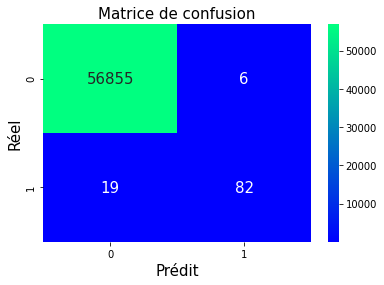

In [5]:
df = pd.read_csv('creditcard.csv').astype(np.float32)
Sc=StandardScaler()
Amount=df["Amount"].values
df["Amount"]=Sc.fit_transform(Amount.reshape(-1,1))
Time=df["Time"].values
df["Time"]=Sc.fit_transform(Time.reshape(-1,1))
x = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

VotingClassification(X_train,Y_train,X_test,Y_test)